In [1]:
# Asset data download
# CQF final project: Portfolio optimization
import yfinance as yf
import pandas as pd 
import time
import matplotlib.pyplot as plt  
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
data = yf.download("NOK T TWTR ZNGA SBUX", start="2009-01-01", end="2019-12-31")
data.fillna(method='bfill', inplace=True)

[*********************100%***********************]  5 of 5 downloaded


In [43]:
data

Adj Close                             Close                       \
                 NOK   SBUX      T   TWTR  ZNGA    NOK   SBUX      T   TWTR   
Date                                                                          
2008-12-31   10.4763   4.06  15.69  44.90  9.50  15.60   4.73  28.50  44.90   
2009-01-02   10.7314   4.22  16.19  44.90  9.50  15.98   4.92  29.42  44.90   
2009-01-05   10.6912   4.25  15.65  44.90  9.50  15.92   4.96  28.43  44.90   
2009-01-06   10.8859   4.38  15.58  44.90  9.50  16.21   5.11  28.30  44.90   
2009-01-07   10.5165   4.28  15.20  44.90  9.50  15.66   4.99  27.21  44.90   
...              ...    ...    ...    ...   ...    ...    ...    ...    ...   
2019-08-26    5.0000  96.50  34.93  41.44  5.60   5.00  96.50  34.93  41.44   
2019-08-27    4.9400  96.09  34.72  42.14  5.72   4.94  96.09  34.72  42.14   
2019-08-28    4.8900  97.07  34.96  41.68  5.73   4.89  97.07  34.96  41.68   
2019-08-29    4.9200  97.70  35.15  42.49  5.79   4.92  97.70  35.15  42.49   
2019-08-30    4.9600  96.56  35.26  42.65  5.71   4.96  96.56  35.26  42.65   

                  ...   Open                                Volume            \
            ZNGA  ...    NOK   SBUX      T   TWTR   ZNGA       NOK      SBUX   
Date              ...                                                          
2008-12-31  9.50  ...  15.45   4.66  28.19  45.10  11.00  10274800   9856800   
2009-01-02  9.50  ...  15.57   4.70  28.74  45.10  11.00   8119200  14885400   
2009-01-05  9.50  ...  15.92   4.94  28.80  45.10  11.00  11639000  16070600   
2009-01-06  9.50  ...  16.03   5.03  28.51  45.10  11.00  10237800  17609800   
2009-01-07  9.50  ...  15.82   5.02  27.65  45.10  11.00  19023100  24216600   
...          ...  ...    ...    ...    ...    ...    ...       ...       ...   
2019-08-26  5.60  ...   5.02  95.38  34.97  41.40   5.63  10257400   5802600   
2019-08-27  5.72  ...   5.01  96.70  35.01  42.01   5.74  19466000   6539800   
2019-08-28  5.73  ...   4.87  96.23  34.67  41.75   5.68  17065200   4948800   
2019-08-29  5.79  ...   4.90  97.85  35.11  42.25   5.77  11566500   4514300   
2019-08-30  5.71  ...   4.97  98.14  35.18  42.70   5.82   9925300   5209500   

                                                
                   T         TWTR         ZNGA  
Date                                            
2008-12-31  20764700  117701600.0  116817000.0  
2009-01-02  21879800  117701600.0  116817000.0  
2009-01-05  32414700  117701600.0  116817000.0  
2009-01-06  28746100  117701600.0  116817000.0  
2009-01-07  30532700  117701600.0  116817000.0  
...              ...          ...          ...  
2019-08-26  23197300    6403600.0   19077800.0  
2019-08-27  32081200   16087500.0   19151700.0  
2019-08-28  24366400   10418400.0   17534400.0  
2019-08-29  23293500   10594400.0   10097100.0  
2019-08-30  21609100    8863600.0    8402900.0  

[2685 rows x 30 columns]

In [23]:
data.columns

MultiIndex([('Adj Close',  'NOK'),
            ('Adj Close', 'SBUX'),
            ('Adj Close',    'T'),
            ('Adj Close', 'TWTR'),
            ('Adj Close', 'ZNGA'),
            (    'Close',  'NOK'),
            (    'Close', 'SBUX'),
            (    'Close',    'T'),
            (    'Close', 'TWTR'),
            (    'Close', 'ZNGA'),
            (     'High',  'NOK'),
            (     'High', 'SBUX'),
            (     'High',    'T'),
            (     'High', 'TWTR'),
            (     'High', 'ZNGA'),
            (      'Low',  'NOK'),
            (      'Low', 'SBUX'),
            (      'Low',    'T'),
            (      'Low', 'TWTR'),
            (      'Low', 'ZNGA'),
            (     'Open',  'NOK'),
            (     'Open', 'SBUX'),
            (     'Open',    'T'),
            (     'Open', 'TWTR'),
            (     'Open', 'ZNGA'),
            (   'Volume',  'NOK'),
            (   'Volume', 'SBUX'),
            (   'Volume',    'T'),
            (   'Vol

In [24]:
data.head()

Adj Close                          Close                          \
                 NOK  SBUX      T  TWTR ZNGA    NOK  SBUX      T  TWTR ZNGA   
Date                                                                          
2008-12-31   10.4763  4.06  15.69  44.9  9.5  15.60  4.73  28.50  44.9  9.5   
2009-01-02   10.7314  4.22  16.19  44.9  9.5  15.98  4.92  29.42  44.9  9.5   
2009-01-05   10.6912  4.25  15.65  44.9  9.5  15.92  4.96  28.43  44.9  9.5   
2009-01-06   10.8859  4.38  15.58  44.9  9.5  16.21  5.11  28.30  44.9  9.5   
2009-01-07   10.5165  4.28  15.20  44.9  9.5  15.66  4.99  27.21  44.9  9.5   

            ...   Open                             Volume                      \
            ...    NOK  SBUX      T  TWTR  ZNGA       NOK      SBUX         T   
Date        ...                                                                 
2008-12-31  ...  15.45  4.66  28.19  45.1  11.0  10274800   9856800  20764700   
2009-01-02  ...  15.57  4.70  28.74  45.1  11.0   8119200  14885400  21879800   
2009-01-05  ...  15.92  4.94  28.80  45.1  11.0  11639000  16070600  32414700   
2009-01-06  ...  16.03  5.03  28.51  45.1  11.0  10237800  17609800  28746100   
2009-01-07  ...  15.82  5.02  27.65  45.1  11.0  19023100  24216600  30532700   

                                      
                   TWTR         ZNGA  
Date                                  
2008-12-31  117701600.0  116817000.0  
2009-01-02  117701600.0  116817000.0  
2009-01-05  117701600.0  116817000.0  
2009-01-06  117701600.0  116817000.0  
2009-01-07  117701600.0  116817000.0  

[5 rows x 30 columns]

In [25]:
pylab.rcParams['figure.figsize'] = (15, 9)   

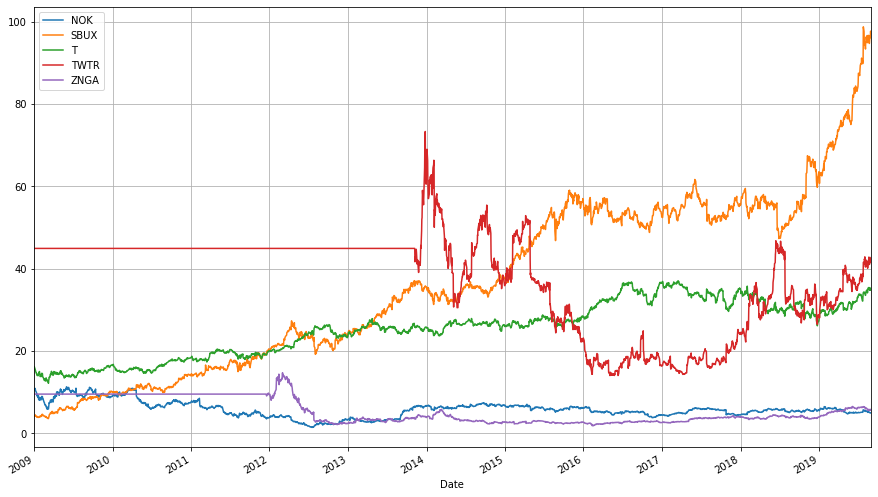

In [26]:
data["Adj Close"].plot(grid = True)

In [72]:
daily_return=data["Adj Close"].pct_change()

In [73]:
daily_return

,NOK,SBUX,T,TWTR,ZNGA
Date,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN
2009-01-02,0.024350,0.039409,0.031867,0.000000,0.000000
2009-01-05,-0.003746,0.007109,-0.033354,0.000000,0.000000
2009-01-06,0.018211,0.030588,-0.004473,0.000000,0.000000
2009-01-07,-0.033934,-0.022831,-0.024390,0.000000,0.000000
...,...,...,...,...,...
2019-08-26,-0.001996,0.019007,0.003159,0.010732,0.005386
2019-08-27,-0.012000,-0.004249,-0.006012,0.016892,0.021429
2019-08-28,-0.010121,0.010199,0.006912,-0.010916,0.001748


In [75]:
daily_log_returns = np.log(daily_return+1)

In [76]:
daily_log_returns

,NOK,SBUX,T,TWTR,ZNGA
Date,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN
2009-01-02,0.024058,0.038652,0.031370,0.000000,0.000000
2009-01-05,-0.003753,0.007084,-0.033923,0.000000,0.000000
2009-01-06,0.018047,0.030130,-0.004483,0.000000,0.000000
2009-01-07,-0.034523,-0.023096,-0.024693,0.000000,0.000000
...,...,...,...,...,...
2019-08-26,-0.001998,0.018829,0.003154,0.010675,0.005372
2019-08-27,-0.012073,-0.004258,-0.006030,0.016751,0.021202
2019-08-28,-0.010173,0.010147,0.006889,-0.010976,0.001747


In [77]:
yearly_returns = data['Adj Close'].resample('A').ffill().pct_change()

In [78]:
yearly_returns

,NOK,SBUX,T,TWTR,ZNGA
Date,,,,,
2008-12-31,NaN,NaN,NaN,NaN,NaN
2009-12-31,-0.144746,1.433498,0.046526,0.000000,0.000000
2010-12-31,-0.166352,0.412955,0.116322,0.000000,0.000000
2011-12-31,-0.502410,0.454155,0.090016,0.000000,-0.009474
2012-12-31,-0.117524,0.182759,0.174675,0.000000,-0.749203
2013-12-31,1.053172,0.480633,0.097571,0.417595,0.610169
2014-12-31,-0.013038,0.062447,0.006599,-0.436449,-0.300000
2015-12-31,-0.085054,0.482129,0.082916,-0.354893,0.007519
2016-12-31,-0.277581,-0.061272,0.298789,-0.295592,-0.041045


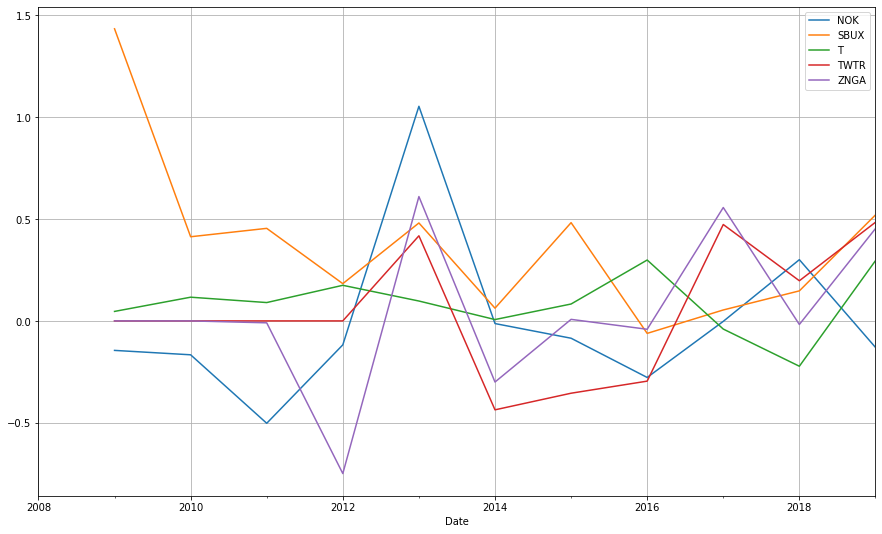

In [79]:
monthly_returns.plot(grid=True)

In [80]:
corr_of_daily_returns=daily_return.corr()

In [81]:
corr_of_daily_returns

,NOK,SBUX,T,TWTR,ZNGA
NOK,1.000000,0.262714,0.271907,0.041711,0.086347
SBUX,0.262714,1.000000,0.341397,0.077946,0.085354
T,0.271907,0.341397,1.000000,0.050938,0.024337
TWTR,0.041711,0.077946,0.050938,1.000000,0.149681
ZNGA,0.086347,0.085354,0.024337,0.149681,1.000000


In [82]:
cov_of_daily_returns=daily_return.cov()

In [83]:
cov_of_daily_returns

,NOK,SBUX,T,TWTR,ZNGA
NOK,0.000735,0.000122,0.000083,0.000028,0.000060
SBUX,0.000122,0.000292,0.000066,0.000033,0.000038
T,0.000083,0.000066,0.000126,0.000014,0.000007
TWTR,0.000028,0.000033,0.000014,0.000620,0.000096
ZNGA,0.000060,0.000038,0.000007,0.000096,0.000661


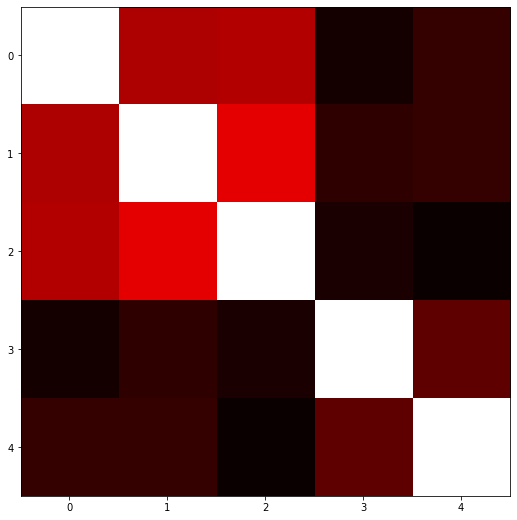

In [85]:
plt.imshow(corr_of_daily_returns, cmap='hot', interpolation='nearest')
plt.show()

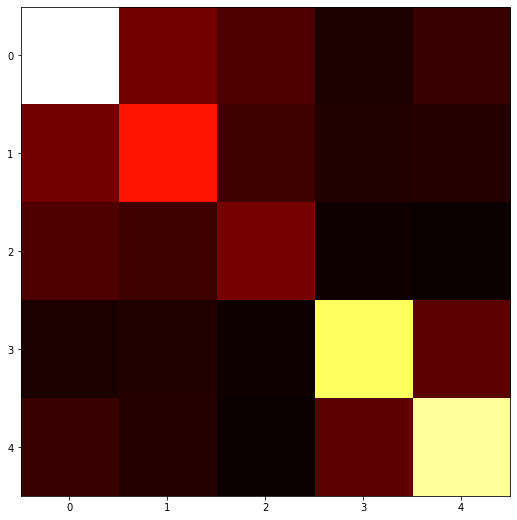

In [86]:
plt.imshow(cov_of_daily_returns, cmap='hot', interpolation='nearest')
plt.show()

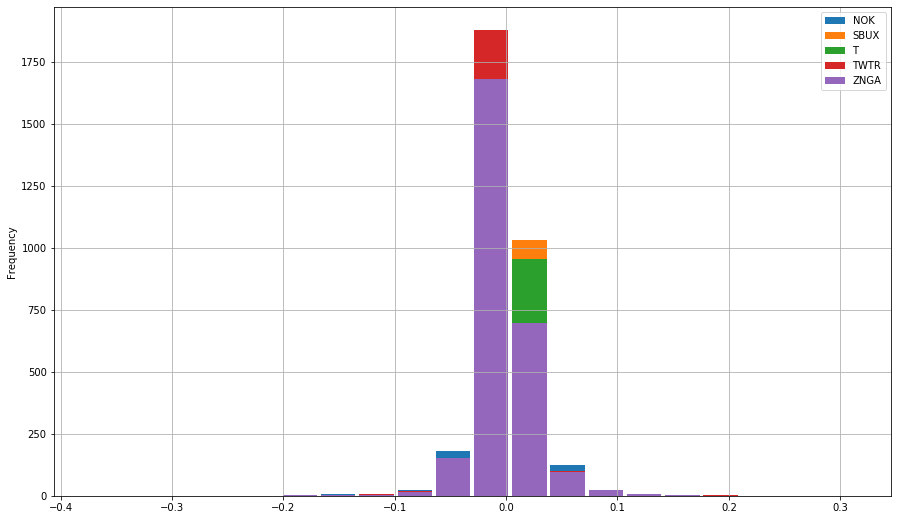

In [88]:
daily_return.plot.hist(grid=True, bins=20, rwidth=0.9)

In [90]:
daily_return.mean()

NOK     0.000088
SBUX    0.001326
T       0.000365
TWTR    0.000295
ZNGA    0.000150
dtype: float64

In [91]:
daily_return.var()

NOK     0.000735
SBUX    0.000292
T       0.000126
TWTR    0.000620
ZNGA    0.000661
dtype: float64

In [92]:
daily_return.skew()

NOK     0.344001
SBUX    0.768851
T      -0.414410
TWTR   -0.460278
ZNGA   -0.857184
dtype: float64

In [95]:
daily_return.kurtosis()

NOK     13.098367
SBUX    10.042502
T        4.105987
TWTR    19.315937
ZNGA    26.117864
dtype: float64

In [100]:
data["Adj Close"]

,NOK,SBUX,T,TWTR,ZNGA
Date,,,,,
2008-12-31,10.4763,4.06,15.69,44.90,9.50
2009-01-02,10.7314,4.22,16.19,44.90,9.50
2009-01-05,10.6912,4.25,15.65,44.90,9.50
2009-01-06,10.8859,4.38,15.58,44.90,9.50
2009-01-07,10.5165,4.28,15.20,44.90,9.50
...,...,...,...,...,...
2019-08-26,5.0000,96.50,34.93,41.44,5.60
2019-08-27,4.9400,96.09,34.72,42.14,5.72
2019-08-28,4.8900,97.07,34.96,41.68,5.73


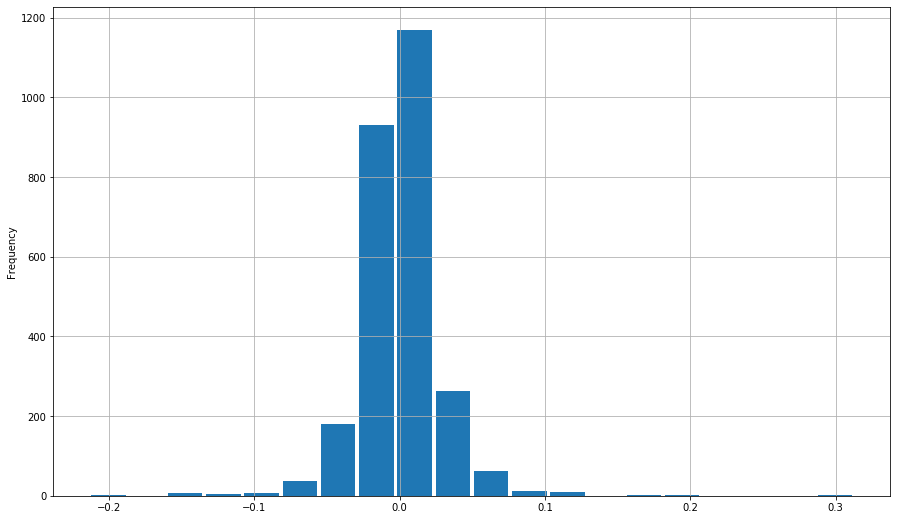

In [102]:
data["Adj Close"]["NOK"].pct_change().plot.hist(grid=True, bins=20, rwidth=0.9)

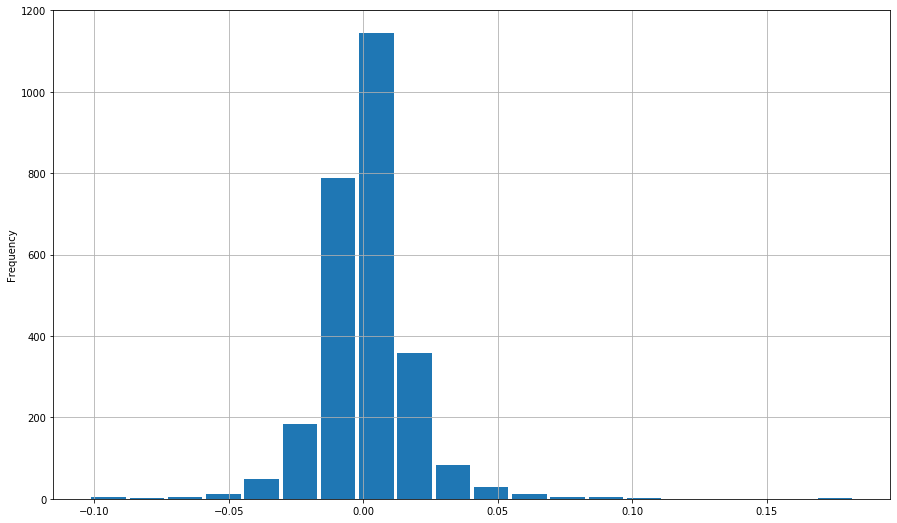

In [103]:
data["Adj Close"]["SBUX"].pct_change().plot.hist(grid=True, bins=20, rwidth=0.9)

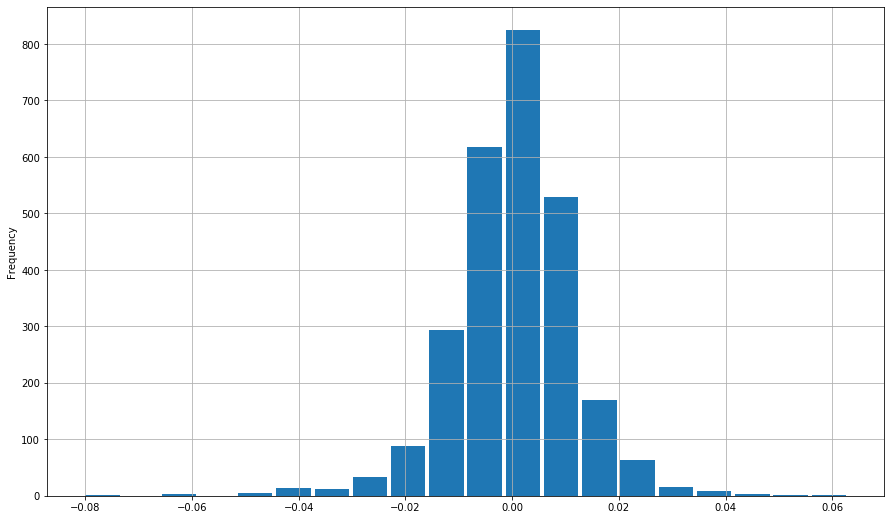

In [104]:
data["Adj Close"]["T"].pct_change().plot.hist(grid=True, bins=20, rwidth=0.9)

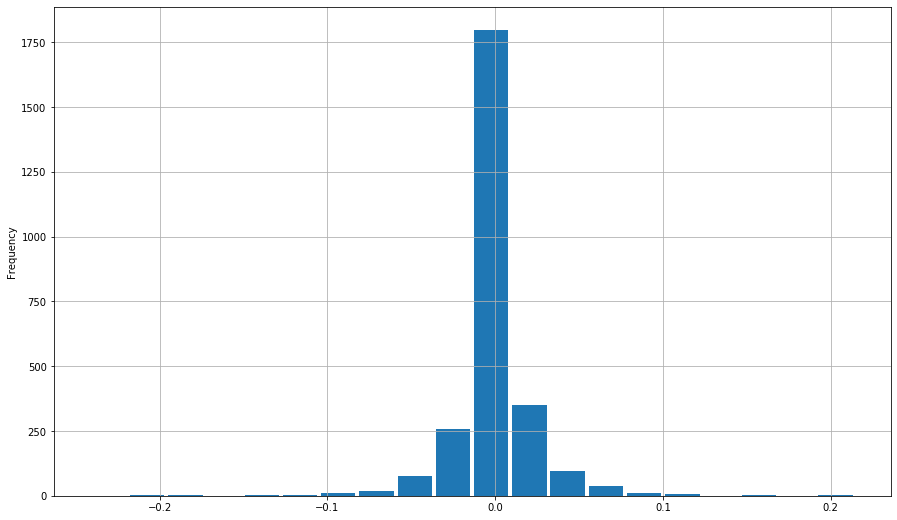

In [105]:
data["Adj Close"]["TWTR"].pct_change().plot.hist(grid=True, bins=20, rwidth=0.9)

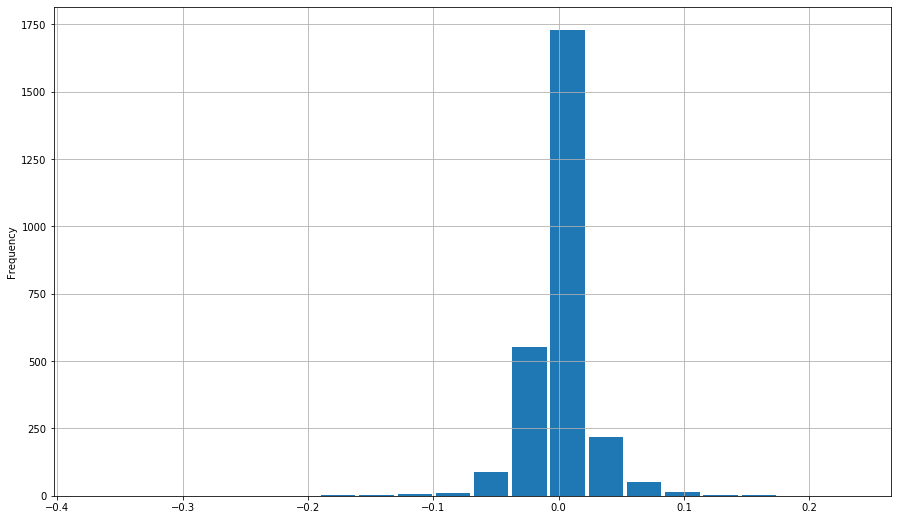

In [106]:
data["Adj Close"]["ZNGA"].pct_change().plot.hist(grid=True, bins=20, rwidth=0.9)